In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers 

In [2]:
gpus = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(gpus[0], 'GPU')

In [3]:
IMG_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
            "Train/",
            shuffle=True,
            image_size= (IMG_SIZE, IMG_SIZE),
            batch_size= BATCH_SIZE)

Found 900 files belonging to 3 classes.


In [6]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
            "Test/",
            shuffle=True,
            image_size= (IMG_SIZE, IMG_SIZE),
            batch_size= BATCH_SIZE)

Found 300 files belonging to 3 classes.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
            "Valid/",
            shuffle=True,
            image_size= (IMG_SIZE, IMG_SIZE),
            batch_size= BATCH_SIZE)

Found 300 files belonging to 3 classes.


In [8]:
class_names = train_ds.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
for img, label in train_ds.take(1):
    print(img.shape)
    print(label.numpy())

(32, 256, 256, 3)
[2 1 0 1 0 2 2 0 1 2 0 0 2 0 1 0 2 1 0 1 0 0 2 1 0 2 0 0 1 1 1 0]


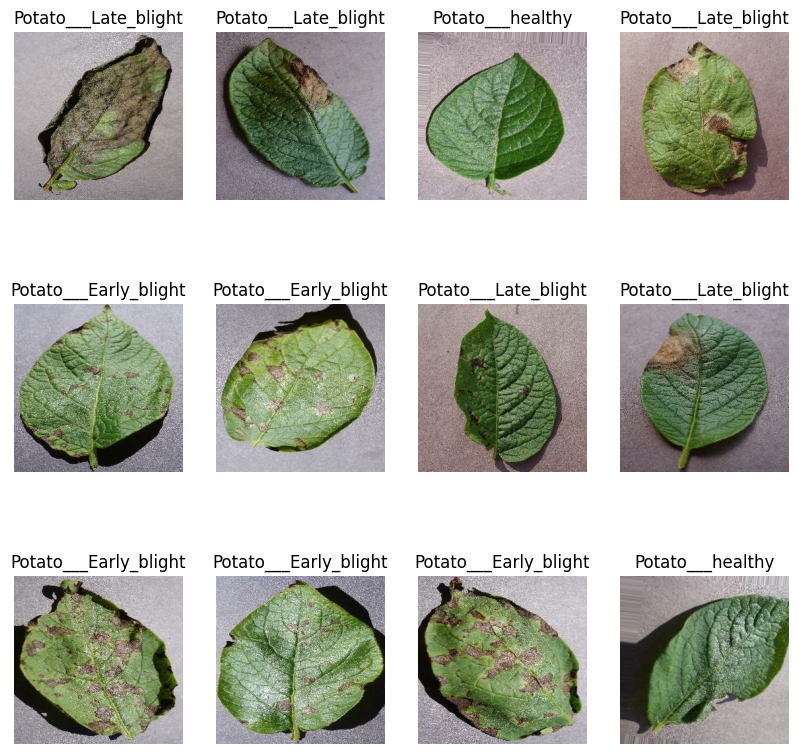

In [10]:
plt.figure(figsize=(10, 10))
for img, label in train_ds.take(1):
    for i in range(12):
        plt.subplot(3,4, i+1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis('off')


In [11]:
train_ds = train_ds.cache().shuffle(300).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(300).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(300).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_and_recale = tf.keras.Sequential([
                    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
                    layers.experimental.preprocessing.Rescaling(1./255)
                    ])

In [13]:
data_augmentation = tf.keras.Sequential([
                    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                    layers.experimental.preprocessing.RandomRotation(0.3)
                    ])

In [14]:
model = models.Sequential([
        resize_and_recale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape=( 32, IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')
])

model.build(input_shape=( 32, IMG_SIZE, IMG_SIZE, 3))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [16]:
callbacks = tf.keras.callbacks.ModelCheckpoint('models/',monitor='val_acc',
                                                   save_best_only=True, mode='max' )

In [17]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']
             )

In [19]:
history = model.fit(train_ds, validation_data=val_ds, epochs = 45, verbose=1, callbacks=[callbacks])

Epoch 1/45
29/29 [==============================] - 8s 277ms/step - loss: 1.0281 - accuracy: 0.4456 - val_loss: 0.5985 - val_accuracy: 0.7000
Epoch 2/45
29/29 [==============================] - 5s 178ms/step - loss: 0.5933 - accuracy: 0.6967 - val_loss: 0.5824 - val_accuracy: 0.7067
Epoch 3/45
29/29 [==============================] - 5s 163ms/step - loss: 0.4679 - accuracy: 0.7956 - val_loss: 0.4406 - val_accuracy: 0.7733
Epoch 4/45
29/29 [==============================] - 5s 164ms/step - loss: 0.4168 - accuracy: 0.8089 - val_loss: 0.4592 - val_accuracy: 0.7600
Epoch 5/45
29/29 [==============================] - 5s 165ms/step - loss: 0.4003 - accuracy: 0.8200 - val_loss: 0.3526 - val_accuracy: 0.8200
Epoch 6/45
29/29 [==============================] - 5s 167ms/step - loss: 0.3393 - accuracy: 0.8600 - val_loss: 0.3133 - val_accuracy: 0.8633
Epoch 7/45
29/29 [==============================] - 5s 166ms/step - loss: 0.3671 - accuracy: 0.8578 - val_loss: 0.3055 - val_accuracy: 0.8633
Epoch 

29/29 [==============================] - 6s 199ms/step - loss: 0.1486 - accuracy: 0.9467 - val_loss: 0.1951 - val_accuracy: 0.9200
Epoch 29/45
29/29 [==============================] - 6s 201ms/step - loss: 0.1517 - accuracy: 0.9411 - val_loss: 0.1613 - val_accuracy: 0.9367
Epoch 30/45
29/29 [==============================] - 6s 202ms/step - loss: 0.1408 - accuracy: 0.9489 - val_loss: 0.1775 - val_accuracy: 0.9067
Epoch 31/45
29/29 [==============================] - 6s 204ms/step - loss: 0.1158 - accuracy: 0.9611 - val_loss: 0.2840 - val_accuracy: 0.8900
Epoch 32/45
29/29 [==============================] - 6s 203ms/step - loss: 0.1048 - accuracy: 0.9633 - val_loss: 0.2014 - val_accuracy: 0.9100
Epoch 33/45
29/29 [==============================] - 6s 203ms/step - loss: 0.1070 - accuracy: 0.9600 - val_loss: 0.2376 - val_accuracy: 0.9133
Epoch 34/45
29/29 [==============================] - 6s 205ms/step - loss: 0.1616 - accuracy: 0.9511 - val_loss: 0.1863 - val_accuracy: 0.9233
Epoch 35/45

In [20]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 1s 37ms/step - loss: 0.1413 - accuracy: 0.9333


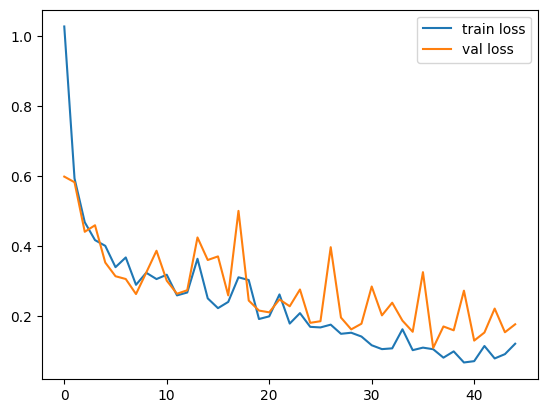

In [21]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

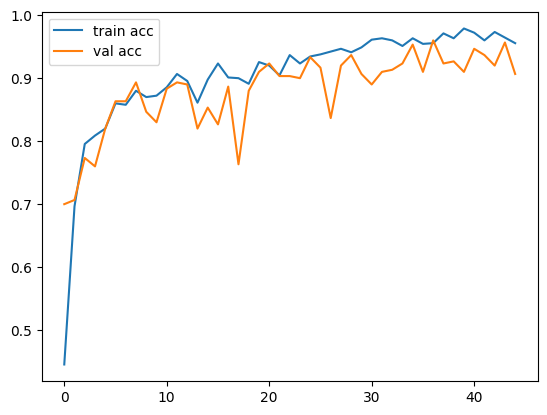

In [22]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

first image to predict
actual label: Potato___healthy
predicted label: Potato___healthy


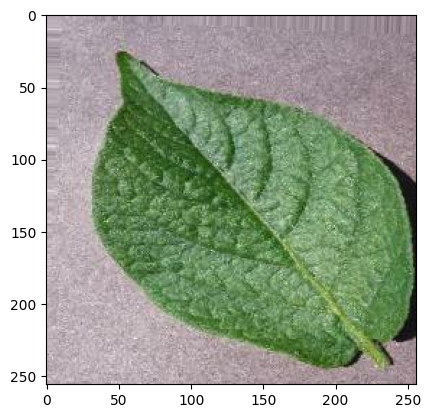

In [23]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch, verbose=0)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array, verbose=0)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

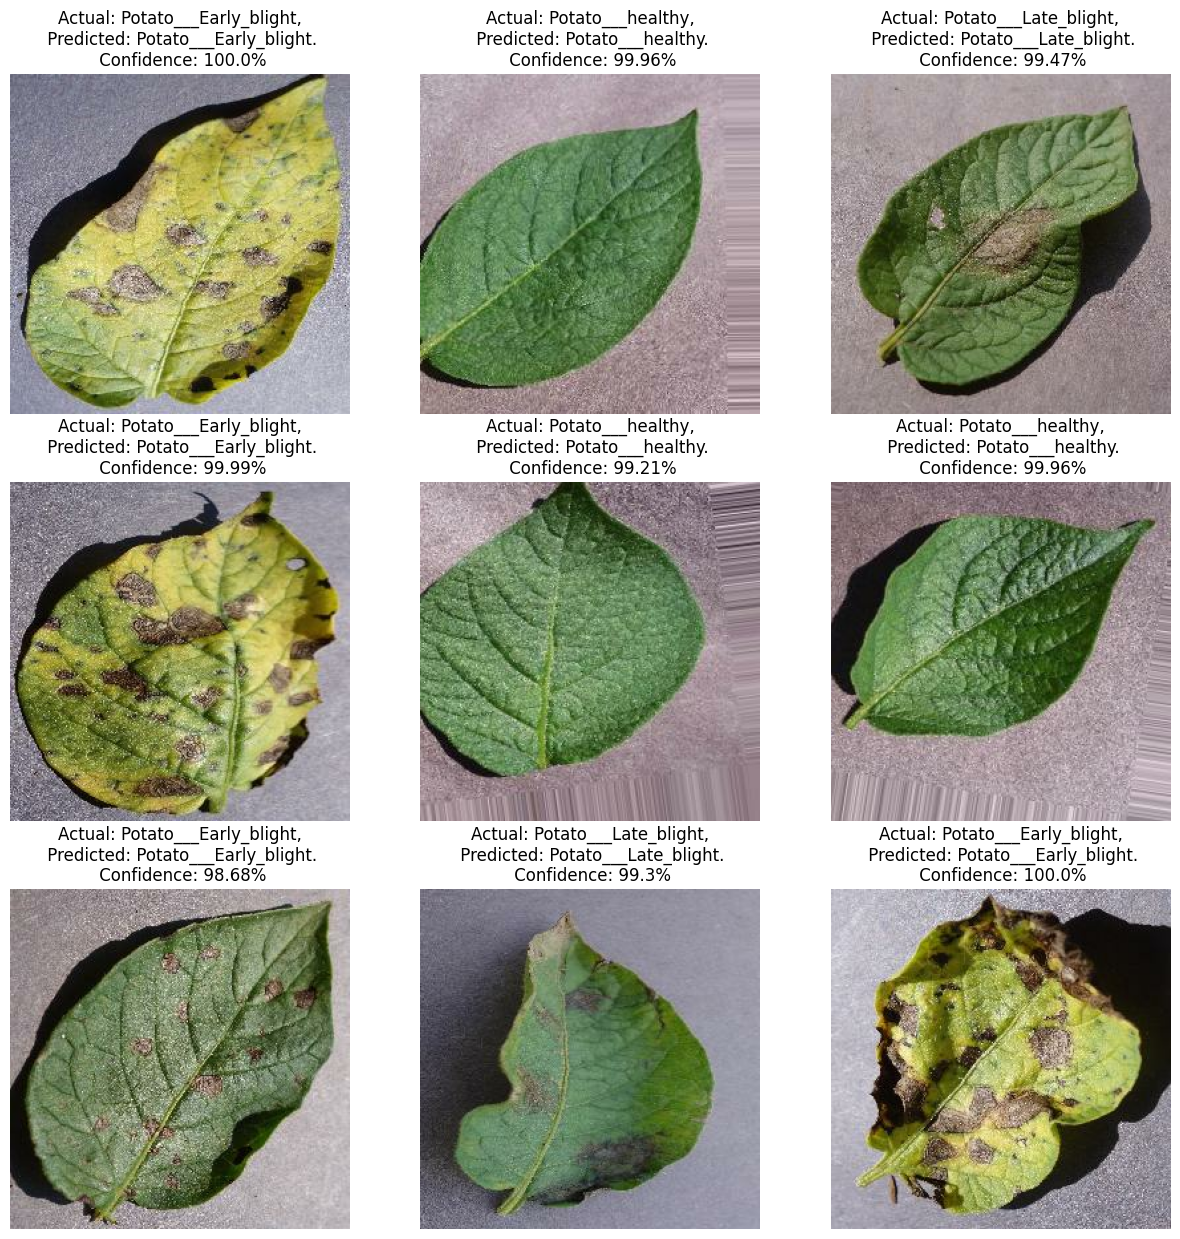

In [25]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [26]:
#model.save("models/potatoes.h5")